### Описание данных
#### Данные для первой части

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части
Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


#### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Необходимо: 
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


#### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача:

- Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


### Часть 1. Приоритизация гипотез

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Без учета количества пользователей, на которые повлияет гипотеза, наиболее перспективными выглядят гипотезы 8, 0 и 7. 

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Если же учесть охват, то наиболее перспективной становится гипотеза 7, а 0 опускается на третью позицию. Более того, гипотеза 7 лидирует с приличным отрывом, так что по результатам проверки по RICE можно рекомендовать в первую очередь именно ее, а затем 2 и 0. Изменение произошло именно потому, что восьмая гипотеза озватит наименьший объем пользователей, а седьмая - набольший.

### Часть 2. Анализ A/B-теста

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [13]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [16]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

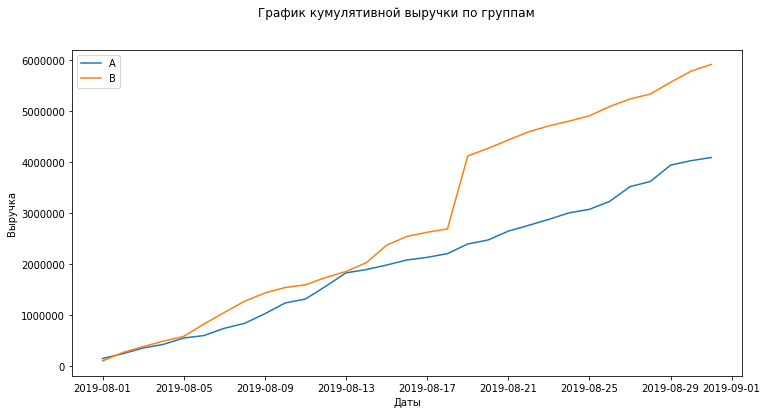

In [17]:
plt.figure(figsize=(12, 6))
plt.suptitle('График кумулятивной выручки по группам')
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.legend()

Выручка в целом растет на протяжении теста, но в одной точке наблюдается резкий всплеск в группе В. Дальнейшего спада при этом нет, что может говорить о системном росте выручки по заказам именно в этой группе.

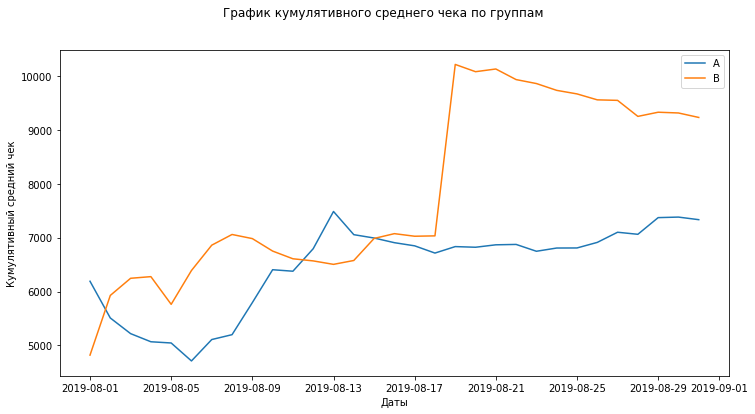

In [18]:
plt.figure(figsize=(12, 6))
plt.suptitle('График кумулятивного среднего чека по группам')
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек')
plt.legend()

Средний чек также резко подскочил в группе В в районе 18.08.19. Для группы А к концу теста он в среднем установился, для группы В падает. Возможно, нужно больше данных для группы В, чтобы стабилизироваться на уровне реального среднего чека.

In [19]:
mergedCummulativeRevenue = (cummulativeRevenueA
                            .merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                           )
mergedCummulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


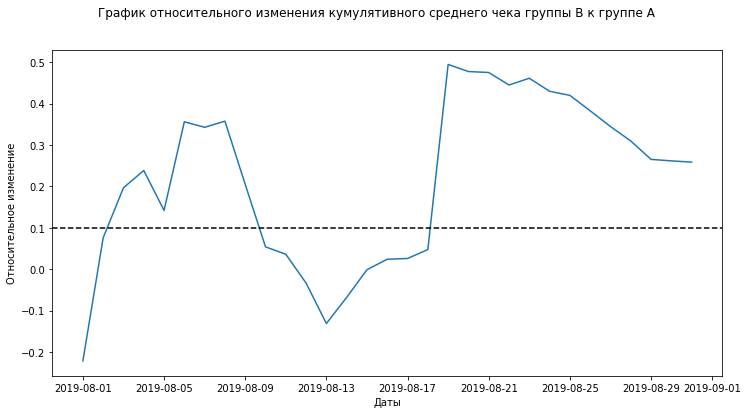

In [20]:
plt.figure(figsize=(12, 6))
plt.suptitle('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.plot(mergedCummulativeRevenue['date'], \
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])\
         /(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.xlabel('Даты')
plt.ylabel('Относительное изменение')
plt.axhline(y=0.1, color='black', linestyle='--')

График относительного различия для среднего чека довольно сильно скачет, причем в обе стороны. Значит, надо искать выбросы, аномально крупные и аномально маленькие заказы. 

In [21]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

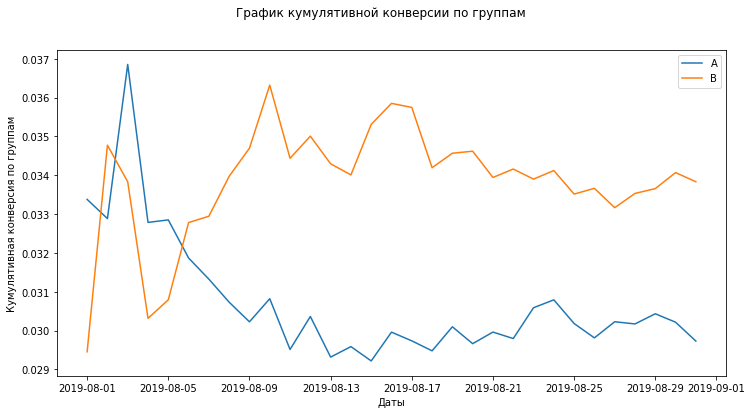

In [22]:
plt.figure(figsize=(12, 6))
plt.suptitle('График кумулятивной конверсии по группам')
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная конверсия по группам')
plt.legend()

График почти симметричный. Конверсия группы В вышла вперед в районе 7 августа и в целом выглядит стабильной. Также стабильной выглядит и конверсия группы А, но она просела примерно начиная с той же даты. Интересно, что 18 августа на графиках не видно никаких из ряда вон выходящих артефактов.

In [23]:
mergedCummulativeConversions = (cummulativeDataA[['date','conversion']]
                                .merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                               )

Text(0, 0.5, 'Относительный прирост')

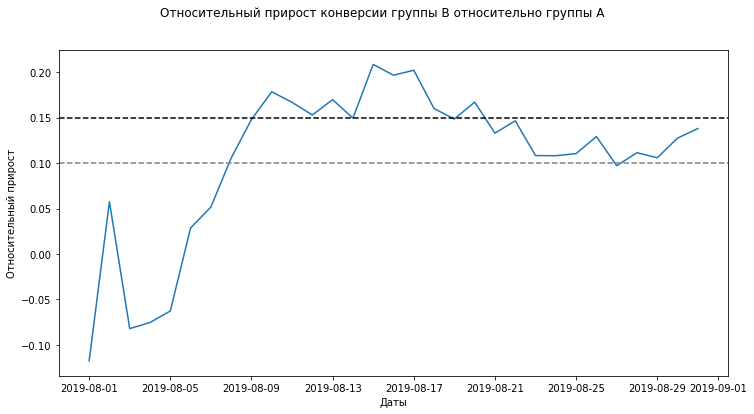

In [24]:
plt.figure(figsize=(12, 6))
plt.suptitle('Относительный прирост конверсии группы B относительно группы A')
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1)
#plt.legend()
plt.axhline(y=0.15, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')
plt.xlabel('Даты')
plt.ylabel('Относительный прирост')
#plt.axis(["2019-08-01", '2019-09-01', -0.1, 0.4])

Конверсия группы В после нестабильных первых дней теста вырвалась вперед в районе 7 мая и с тех пор демонстрирует относительный прирост на уровне не ниже 0.1. Посление четыре дня теста не характеризуются стабильным поведением конверсии, так что предметные выводы можно будет делать после анализа выбросов и аномалий. Впрочем, колебания эти сосредоточены на малом диапазоне.

In [25]:
ordersByUsers = (orders
                 .drop(['group', 'revenue', 'date'], axis=1)
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId' : pd.Series.nunique})
                )
ordersByUsers.columns = ['userId','orders']
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [26]:
ordersByUsers['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Как минимум три четверти пользователей совершили не более одного заказа. При этом максимальное число заказов составляет 11.

In [27]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


И таких пользователей всего два. Еще двое сделали 9 и 8 заказов соответственно, все остальные - не больше пяти.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

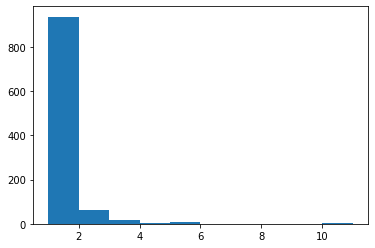

In [28]:
plt.hist(ordersByUsers['orders'])

Большинство покупателей заказывало только один раз. Доля пользователей с 2-3 заказами также заслуживает внимания.

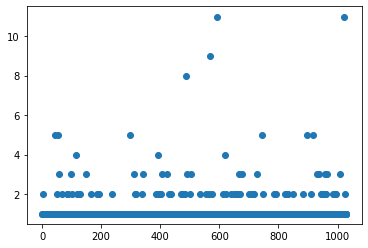

In [29]:
x_values_orders_by_users = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values_orders_by_users, ordersByUsers['orders'])

Да, пользователей с двумя-тремя заказами действительно много. Вопрос в том, считать ли аномалиями число заказов, превышающее 4.

In [30]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Более двух заказов оформили не более 5% пользователей. Тех же, кто оформил более четырех заказов - не более процента. Разумной представляется граница в размере трех заказов: такие пользователи все же регулярно встречаются на графике. А вот все что выше - аномалия.

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <a list of 10 Patch objects>)

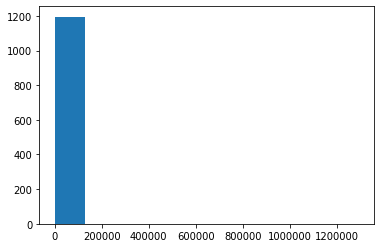

In [31]:
plt.hist(orders['revenue'])

Если в данных и есть заказы дороже 200 000, то их исчезающе мало: в масштабе стандартного графика они не заметны.

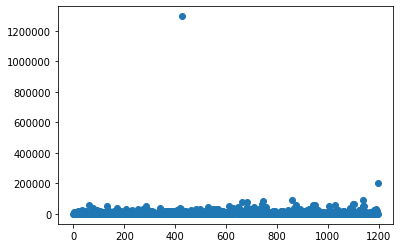

In [32]:
x_values_orders_revenue = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_orders_revenue, orders['revenue'])

Их вообще всего два, причем один заказ абсолютно космический - около полутора миллионов! Это похоже не просто на аномалию, а на ошибку в данных, которую стоит обсудить с коллегами. 

In [33]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% заказов дороже 58 233. Разумным представляется порог в 30 000. 

In [34]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [35]:
visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [36]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [37]:
visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [38]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [39]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [40]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [41]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [42]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


В этой таблице названия столбцов:

-	date — дата;
-	ordersPerDateA — количество заказов в выбранную дату в группе A;
-	revenuePerDateA — суммарная выручка в выбранную дату в группе A;
-	ordersPerDateB — количество заказов в выбранную дату в группе B;
-	revenuePerDateB — суммарная выручка в выбранную дату в группе B;
-	ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
-	revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
-	ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
-	revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
-	visitorsPerDateA — количество пользователей в выбранную дату в группе A;
-	visitorsPerDateB — количество пользователей в выбранную дату в группе B;
-	visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
-	visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [43]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [44]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [45]:
# выше показали кол-во заказов для тех пользователей из каждой группы, кто сделал хоть один заказ
# теперь добавим тех, кто ничего не заказывал, с нулями в графе "покупки"
sampleA = pd.concat([ordersByUsersA['orders'],\
                      pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                               name='orders')],axis=0)

In [46]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [47]:
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

#### Проверка статистической значимости различий в конверсии между группами по «сырым» данным


Гипотеза 0: Конверсия между группами по «сырым» данным одинакова

Гипотеза 1: Разница в конверсии между группами по «сырым» данным статистически значима

In [48]:
p_value_conversion_wet = st.mannwhitneyu(sampleA, sampleB)[1]
p_value_conversion_wet

0.008396177528376304

In [49]:
relative_conversion_wet = (sampleB.mean()/sampleA.mean()-1) * 100
relative_conversion_wet

13.807884655320146

P-value меньше, чем 0.05, и даже меньше, чем 0.01. Значит, на сырых данных гипотезу об отсутствии статистически значимых различий в конверсии нужно отвергнуть: конверсия отличается. Второе число показывает, насколько: конверсия группы В на сырых данных статистически выше на 13.8%. 

#### Проверка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Гипотеза 0: Средний чек в обеих группах по «сырым» данным одинаков

Гипотеза 1: Разница в среднем чеке заказа между группами по «сырым» данным статистически значима

In [50]:
p_value_revenue_wet = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
p_value_revenue_wet

0.3646454927716229

In [51]:
relative_revenue_wet = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
relative_revenue_wet

0.2587136699126005

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы A, более чем на четверть.

Теперь отбросим аномалии. Аномальными пользователями считаем тех, кто совершил от 4 заказов или совершил заказ от 30 000 р. Так уберем от 1 до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [52]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithManyOrders.head()

18      199603092
23      237748145
227    2038680547
269    2378935119
278    2458001652
Name: userId, dtype: int64

In [53]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

In [54]:
abnormalUsers.shape

(57,)

Аномальных пользователей всего 57.

In [55]:
sampleAFiltered = (pd
                   .concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
                            pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
                  )
sampleBFiltered = (pd
                   .concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
                            pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
                  )


#### Проверка статистической значимости различий в конверсии между группами по «очищенным» данным

Гипотеза 0: Конверсия между группами по «очищенным» данным одинакова

Гипотеза 1: Разница в конверсии между группами по «очищенным» данным статистически значима

In [56]:
p_value_conversion_filtered = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
p_value_conversion_filtered

0.009158750447124513

In [57]:
relative_conversion_filtered = (sampleBFiltered.mean()/sampleAFiltered.mean()-1) * 100
relative_conversion_filtered

14.751762238323462

Результаты по конверсии практически не изменились. P-value по-прежнему меньше, чем 0.01, да преимущество конверсии группы В над группой А стало чуть более явным - почти 15% вместо почти 14. Таким образом, на конверсию аномалии почти не повлияли

#### Проверка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Гипотеза 0: Средний чек в обеих группах по «очищенным» данным одинаков

Гипотеза 1: Разница в среднем чеке заказа между группами по «очищенным» данным статистически значима

In [58]:
p_value_revenue_filtered = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
p_value_revenue_filtered

0.47916157418313127

In [59]:
relative_revenue_filtered = orders[np.logical_and(orders['group']=='B',\
                                                  np.logical_not(orders['visitorId']\
                                                                 .isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A',\
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1

relative_revenue_filtered

-0.01970168049748655

P-value сохранился на уровне значительно выше 0.05. Следовательно, нельзя отвергнуть гипотезу, что в средних чеках групп А и В нет различий. При этом аномалии оказались настолько выбивающимися из общей тенденции, что без их учета средний чек группы В оказался даже ниже чека группы А, хоть и ненамного - в пределах 2%.

### Общий вывод по А/В тесту

- На сырых данных графики кумулятивного среднего чека по группам и относительного изменения среднего чека группы В к группе А нестабильны вплоть до последних дней теста. 
- При этом график кумулятивной конверсии выглядит стабильным, а график относительного изменения кумулятивной конверсии группы В к группе А продолжает колебаться. 
- Аномальные покупатели не повлияли на поведение метрик, кроме одной: присутствие аномальных покупателей сделало средний чек группы В существенно выше среднего чека группы А. В то же время на данных без учета аномалий средний чек группы В к концу теста оказался несущественно ниже среднего чека группы А. 
- Таким образом, данных А/В теста достаточно, чтобы подтвердить более высокую конверсию в группе В по сравнению с группой А. Следовательно, в том, что касается конверсии, тест можно останавливать и зафиксировать победу группы В (на 14.7% выше). 